In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install mxnet==1.7.0.post1
!pip install mxnet-cu101
!pip install gluoncv==0.8.0

     |████████████████████████████████| 55.0MB 57kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 348.5MB 27kB/s 
     |████████████████████████████████| 819kB 8.7MB/s 


### Read CSV file

In [25]:
cd /content/drive/MyDrive/Medical-Image-Analysis/

/content/drive/.shortcut-targets-by-id/1-GVPEFhU7Mb5rFzdJYfXgXZ32PQypRSX/Medical-Image-Analysis


In [5]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [26]:
!ls

dataset		train_faster_rcnnver2_custom.py
example_yolo_1	VER13faster_rcnn_resnet50_v1b_custom_train.log


In [6]:
from mxnet import nd, gpu, gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import time

In [24]:
!cat dataset/training_set.lst

0	4	5	1000	1000	0.0	0.272	0.408	0.316	0.454	dataset/training_set/Patient 1/1_15.tif
1	4	5	1000	1000	0.0	0.272	0.414	0.312	0.45	dataset/training_set/Patient 1/1_17.tif
2	4	5	1000	1000	0.0	0.244	0.372	0.314	0.45	dataset/training_set/Patient 1/1_21.tif
3	4	5	1000	1000	0.0	0.254	0.396	0.312	0.448	dataset/training_set/Patient 1/1_23.tif
4	4	5	1000	1000	0.0	0.25	0.388	0.314	0.45	dataset/training_set/Patient 1/1_25.tif
5	4	5	1000	1000	0.0	0.25	0.348	0.312	0.454	dataset/training_set/Patient 1/1_27.tif
6	4	5	1000	1000	0.0	0.25	0.342	0.314	0.45	dataset/training_set/Patient 1/1_29.tif
7	4	5	1000	1000	0.0	0.256	0.35	0.308	0.45	dataset/training_set/Patient 1/1_31.tif
8	4	5	1000	1000	0.0	0.254	0.34	0.316	0.452	dataset/training_set/Patient 1/1_33.tif
9	4	5	1000	1000	0.0	0.248	0.328	0.314	0.454	dataset/training_set/Patient 1/1_35.tif
10	4	5	1000	1000	0.0	0.246	0.344	0.322	0.452	dataset/training_set/Patient 1/1_37.tif
11	4	5	800	800	0.0	0.5125	0.4875	0.56125	0.55	0.0	0.535	0.59875	0.56	0.625	dataset/tr

In [ ]:
!  python train_faster_rcnn_voc_custom.py  --network resnet50_v1b --epochs 2 


[19:38:09] ../src/storage/storage.cc:110: Using GPUPooledRoundedStorageManager.
/usr/local/lib/python3.7/dist-packages/mxnet/gluon/parameter.py:712: UserWarning: Constant parameter "fasterrcnn0_rpn0_rpnanchorgenerator0_anchor_" does not support grad_req other than "null", and new value "write" is ignored.
  'is ignored.'.format(self.name, req))
INFO:root:Namespace(amp=False, batch_size=1, custom_model=None, dataset='voc', disable_hybridization=False, epochs=2, executor_threads=1, gpus='0', horovod=False, kv_store='nccl', log_interval=100, lr=0.001, lr_decay=0.7, lr_decay_epoch='14,20', lr_warmup=0.1, lr_warmup_factor=0.3333333333333333, mixup=False, momentum=0.8, network='resnet50_v1b', no_mixup_epochs=20, norm_layer=None, num_workers=4, rcnn_smoothl1_rho=1.0, resume='', rpn_smoothl1_rho=0.1111111111111111, save_interval=10, save_prefix='VER13faster_rcnn_resnet50_v1b_custom', seed=233, start_epoch=0, static_alloc=False, use_fpn=False, val_interval=1, verbose=False, wd=0.0005)
INFO:root

In [ ]:
import logging
import time
import numpy as np
import mxnet as mx
from mxnet import gluon
from mxnet.contrib import amp
import gluoncv as gcv

gcv.utils.check_version('0.7.0')
from gluoncv import data as gdata
from gluoncv import utils as gutils
from gluoncv.model_zoo import get_model
from gluoncv.data.batchify import FasterRCNNTrainBatchify, Tuple, Append
from gluoncv.data.transforms.presets.rcnn import FasterRCNNDefaultTrainTransform, \
    FasterRCNNDefaultValTransform
from gluoncv.utils.metrics.voc_detection import VOCMApMetric
from gluoncv.utils.parallel import Parallel
from gluoncv.utils.metrics.rcnn import RPNAccMetric, RPNL1LossMetric, RCNNAccMetric, \
    RCNNL1LossMetric
from gluoncv.model_zoo.rcnn.faster_rcnn.data_parallel import ForwardBackwardTask
from gluoncv.data import LstDetection
import argparse
import os

In [ ]:
train_dataset = LstDetection('train.lst', root=os.path.expanduser('.'))
class_names = ['bleeding']

In [ ]:
net = get_model('faster_rcnn_resnet50_v1b_custom', classes=class_names,
    pretrained_base=False, transfer='voc')

In [ ]:
net.load_parameters("VER11faster_rcnn_resnet50_v1b_custom_best.params")

MXNetError: ignored

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1-foFv7jDZYOt-ZsnlwKozOoH6lGW_Sqm/DataSet14_20200429/raw_patient_based'

Namespace(amp=False, batch_size=1, custom_model=None, dataset='voc', disable_hybridization=False, epochs=60, executor_threads=1, gpus='0', horovod=False, kv_store='nccl', log_interval=100, lr=0.001, lr_decay=0.7, lr_decay_epoch='14,20', lr_warmup=0.1, lr_warmup_factor=0.3333333333333333, mixup=False, momentum=0.8, network='resnet50_v1b', no_mixup_epochs=20, norm_layer=None, num_workers=4, rcnn_smoothl1_rho=1.0, resume='', rpn_smoothl1_rho=0.1111111111111111, save_interval=10, save_prefix='VER13faster_rcnn_resnet50_v1b_custom', seed=233, start_epoch=0, static_alloc=False, use_fpn=False, val_interval=1, verbose=False, wd=0.0005)
Start training from [Epoch 0]
[Epoch 0 Iteration 0] Set learning rate to 0.0003333333333333333
[Epoch 0][Batch 99], Speed: 3.130 samples/sec, RPN_Conf=0.043,RPN_SmoothL1=0.003,RCNN_CrossEntropy=0.142,RCNN_SmoothL1=0.082,RPNAcc=0.991,RPNL1Loss=0.452,RCNNAcc=0.950,RCNNL1Loss=1.961
[Epoch 0][Batch 199], Speed: 4.586 samples/sec, RPN_Conf=0.033,RPN_SmoothL1=0.003,RCN

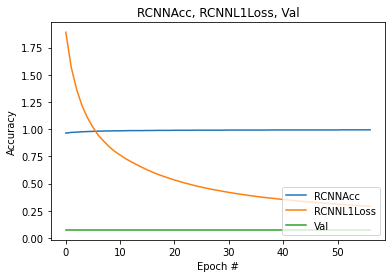

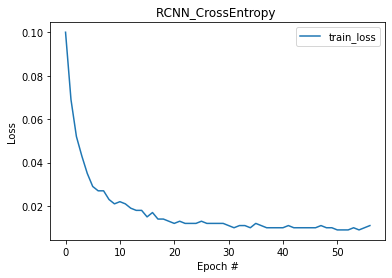

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import re
import numpy as np
import pandas as pd

logs = [
	(53, "VER13faster_rcnn_resnet50_v1b_custom_train.log"),			# lr=1e-2
]
# initialize the list of train rank-1 and rank-5 accuracies, along
# with the training loss
(trainRank1, trainRank5, trainLoss) = ([], [], [])
# initialize the list of validation rank-1 and rank-5 accuracies,
# along with the validation loss
(valRank1, valRank5, valLoss) = ([], [], [])
# loop over the training logs
for (i, (endEpoch, p)) in enumerate(logs):
	# load the contents of the log file, then initialize the batch
	# lists for the training and validation data
	rows = open(p).read().strip()
	(bTrainRank1, bTrainRank5, bTrainLoss) = ([], [], [])
	(bValRank1, bValRank5, bValLoss) = ([], [], [])
	# grab the set of training epochs
	print (rows)
	epochs = set(re.findall(r'Epoch (\d+)\]', rows))
	epochs = sorted([int(e) for e in epochs])
	print (epochs)
	# loop over the epochs
	for e in epochs:
		# find all rank-1 accuracies, rank-5 accuracies, and loss
		# values, then take the final entry in the list for each
		if e == epochs [-1]: 
			break

		s = r'Epoch ' + str(e) + '\].*RCNNAcc=(.*),'
		rank1 = re.findall(s, rows)[-1]
		s = r'Epoch ' + str(e) + '\].*RCNNL1Loss=(.*)\n'
		rank5 = re.findall(s, rows)[-1]
		s = r'Epoch ' + str(e) + '\].*RCNN_CrossEntropy=(.*),'
		loss = re.findall(s, rows)[-1]
		# update the batch training lists
		bTrainRank1.append(float(rank1))
		bTrainRank5.append(float(rank5))
		bTrainLoss.append(float(loss))  
		# print ("epoch" )
		# print (e )        
  	# extract the validation rank-1 and rank-5 accuracies for each
		# epoch, followed by the loss
		val = re.findall(r'bleeding_site=(.*)', rows)[-1]
		bValRank1.append(float(val))  
		# convert the validation rank-1, rank-5, and loss lists to floats
		# a = r'.*bleeding_site=(.*)'
		# ValRank1 = re.findall(a, rows)[-1]
		# bValRank1.append(float(ValRank1)) 

		# # convert the validation rank-1, rank-5, and loss lists to floats
		# print (bValRank1)
print ('done')


plt.figure()
plt.plot(np.arange(0, len(bTrainRank1)), bTrainRank1,
	label="RCNNAcc")
plt.plot(np.arange(0, len(bTrainRank5)), bTrainRank5,
	label="RCNNL1Loss")
plt.plot(np.arange(0, len(bValRank1)), bValRank1,
	label="Val")

plt.title("RCNNAcc, RCNNL1Loss, Val")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
# plot the losses

fig= plt.figure()
plt.plot(np.arange(0, len(bTrainLoss)), bTrainLoss,
	label="train_loss")

plt.title("RCNN_CrossEntropy ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

Testing/Bleeding/Patient 1011/1011_27_29.jpg


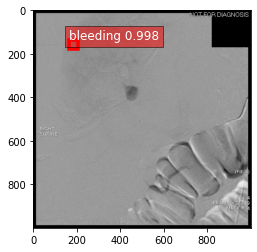

In [ ]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import numpy as np
import random
import cv2
import csv
input_order = [27]
for i in input_order:
  index = str(i)
  im_fname = 'Testing/Bleeding/Patient 1011/1011_' + index + '_29.jpg'
  print (im_fname)
  x, img = gcv.data.transforms.presets.rcnn.load_test(im_fname, short=416)
  img = mx.image.imread(im_fname)
 #ax = utils.viz.plot_image(img)
  #plt.show()
  class_IDs, scores, bounding_boxs = net(x)

  class_IDs, scores, bounding_boxs = net(x)

  ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
  plt.show()



In [ ]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import numpy as np
import random
import cv2
import csv

c = np.array(['bleeding']) # numpy array of class name.

# TODO: update the model_name
model_name = 'faster_rcnn_resnet50_v1b_custom'
first_n_prediction = 3
iou_threshold = [0.0001, 0.1, 0.2]
param_name = 'VER13faster_rcnn_resnet50_v1b_custom_best.params'

def getBbox(csv_fname):
    """Get the bounding box of a image

    Retrieve the bounding box(es) in the csv file by using the csv reader. 
    Bounding box format: [xmin, ymin, xmax, ymax]

    Args:
        csv_fname: file path to label file ending with .csv

    Returns:
        an array of bounding boxes
    """
    bboxes = []
    with open(csv_fname, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            bboxes.append([int(row["BX"]), 
                           int(row["BY"]), 
                           int(row["BX"]) + int(row["Width"]), 
                           int(row["BY"]) + int(row["Height"])])
    return bboxes

def evaluate_single(net, im_fname, first_n_prediction, iou_threshold):
    """Evaluate a single image

    Compute iou of first n prediction and ground truth box. 

    Args:
        net: model with trained weights
        im_fname: file path to image file ending with .tif
        first_n_prediction: number of prediction bounding box 
        iou_threshold: an array of iou threshold, e.x. [0.001, 0.1, 0.2]

    Returns:
        an array of 0 and 1, where 0 means the iou between predicted bbox is 
        less than the corresponding threshold
    """
    im = cv2.imread(im_fname)
    x, img = data.transforms.presets.yolo.load_test(im_fname, short=im.shape[0])

    class_IDs, scores, predicted_bounding_boxs = net(x)
    ground_truth_boxes = np.array(getBbox(im_fname.replace('.tif', '.csv')))
    result = [0] * len(iou_threshold)
    max_iou = 0
    for ground_truth_box in ground_truth_boxes:
        for box in predicted_bounding_boxs[0][:first_n_prediction]:
            box = box.asnumpy()
            xmin = max(box[0], ground_truth_box[0])
            ymin = max(box[1], ground_truth_box[1])
            xmax = min(box[2], ground_truth_box[2])
            ymax = min(box[3], ground_truth_box[3])
            inter_area = max(0, xmax - xmin + 1) * max(0, ymax - ymin + 1)
            ground_truth_box_area = (ground_truth_box[2] - ground_truth_box[0] + 1) * (ground_truth_box[3] - ground_truth_box[1] + 1)
            box_area = (box[2] - box[0] + 1) * (box[3] - box[1] + 1)
            iou = inter_area / float(ground_truth_box_area + box_area - inter_area)
            max_iou = max(iou, max_iou)
        for i in range(len(iou_threshold)):
            if max_iou > iou_threshold[i]:
                result[i] = 1
    return result, max_iou

def evaluate_all(net, files_path, first_n_prediction, iou_threshold):
    """Evaluate testing images

    Compute and print the precision of trained weight

    Args:
        net: model with trained weights
        files_path: file containing all testing file pathes
        first_n_prediction: number of prediction bounding box 
        iou_threshold: an array of iou threshold, e.x. [0.001, 0.1, 0.2]

    Returns:
        Print the precision of each iou threshold
    """
    print("iou", iou_threshold)
    files = np.loadtxt(files_path, dtype=np.str, delimiter='/n')
    num_of_files = 0
    num_correct = [0] * len(iou_threshold)
    for file in files:
        print(file)
        single_result, iou = evaluate_single(net, file, first_n_prediction, iou_threshold)
        print(iou)
        for i in range(len(iou_threshold)):
            num_correct[i] += single_result[i]
        num_of_files += 1
    for i in range(len(iou_threshold)):
        print(iou_threshold[i], num_correct[i] / num_of_files)
    return num_correct, num_of_files

def main():
    net = model_zoo.get_model(model_name, classes=['bleeding'],	
    pretrained_base=False, transfer='voc')
    net.load_parameters(param_name)
    num_correct, num_of_files = evaluate_all(net, "testfile_name.txt", first_n_prediction, iou_threshold)
	    

if __name__ == "__main__":
    main()



iou [0.0001, 0.1, 0.2]
Testing/Bleeding/Patient 1002/1002_21_34.tif
0.36522637577014044
Testing/Bleeding/Patient 1002/1002_23_34.tif
0.485880813309138
Testing/Bleeding/Patient 1002/1002_25_34.tif
0.4695201804419434
Testing/Bleeding/Patient 1002/1002_27_34.tif
0.0
Testing/Bleeding/Patient 1002/1002_29_34.tif
0.0
Testing/Bleeding/Patient 1002/1002_31_34.tif
0.0
Testing/Bleeding/Patient 1003/1003_11_32.tif
0.38919373146416153
Testing/Bleeding/Patient 1003/1003_15_32.tif
0.61799030524905
Testing/Bleeding/Patient 1003/1003_19_32.tif
0.007834924341074198
Testing/Bleeding/Patient 1003/1003_21_32.tif
0.0
Testing/Bleeding/Patient 1003/1003_25_32.tif
0.20728352958344667
Testing/Bleeding/Patient 1003/1003_27_32.tif
0.023386629543419486
Testing/Bleeding/Patient 1003/1003_29_32.tif
0.02732004019864601
Testing/Bleeding/Patient 1003/1003_31_32.tif
0.03263195526963914
Testing/Bleeding/Patient 1003/1003_9_32.tif
0.0
Testing/Bleeding/Patient 1004/1004_18_51.tif
0.0
Testing/Bleeding/Patient 1004/1004_20_